<a href="https://colab.research.google.com/github/dandoush/HCIA/blob/main/Linear_regression_hcia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#define dataset

# Features

x = [3, 21, 22, 34, 54, 34, 55, 67, 89, 90]

# y lable
y= [1, 10, 14, 34, 44, 26, 22, 67, 79, 90]


In [4]:
# convert to array
x = np.array(x)
y = np.array(y)
type (y)


numpy.ndarray

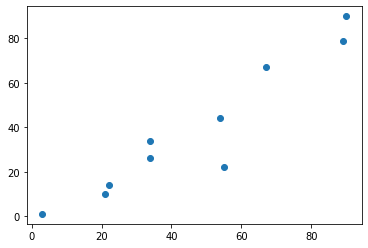

In [5]:
#plot
plt.scatter(x,y)


In [6]:
#define the model as straight line
def model(a, b, x):
  return a*x + b


Affter defining our model that is a line, we need to define our error/loss function

In [7]:
# loss function that takes a, b, the features x and target y parametres / MSE
def loss(a, b, x, y):
  num = len(x) #number of samples
  prediction = model (a, b, x) #predict an output based on input sample, then we can sub predict value from real and find the error, see day 3 HCIA 27/01/22
  return (0.5/num)*np.square(prediction - y).sum()


Let us do optimization based on grandied descend for searching minimum loss function (see after differential derivatives respect to a and b, day 3 HCIA


In [8]:
#optimization function
def optimize(a, b, x, y):
  num = len(x)
  prediction = model (a, b, x)
  #define the 2 derivatives with respect to a and then to b
  d_a = (1.0/num)*((prediction-y)*x).sum()
  d_b = (1.0/num)*(prediction-y).sum()
  #define now the new values of parametres a and b such that we minimize the loss
  a = a - lr*d_a #lr is the learning rate
  b = b - lr*d_b
  return a,b




In [9]:
#Define how many iteration do we have before to stop searching local minimum
def iterate(a, b, x, y, steps):
  for i in range(steps):
    a,b = optimize(a, b, x, y)
    return a,b

In [10]:
#Hyperparameter
lr = 0.0001


In [26]:
#initialize a and b as random value
a = np.random.rand(1)
b = np.random.rand(1)
a, b


(array([0.31759457]), array([0.03216125]))

[0.85904674] [0.0383086] 51.2677208850243


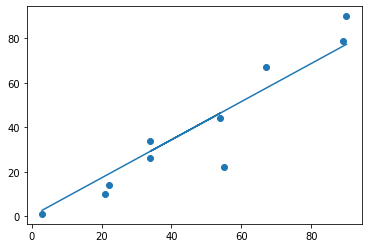

In [38]:
# Lunch our model to test
a, b = iterate (a,b, x, y, 10000)
prediction = model (a,b,x)
los = loss(a, b, x, y)
print (a, b, los)
plt.scatter(x,y)
plt.plot(x,prediction)
